In [32]:
import pandas as pd
import os
import numpy as np

# from prediction_utils.pytorch_utils.metrics import (
#     StandardEvaluator,
#     FairOVAEvaluator,
#     CalibrationEvaluator
# )

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("ticks")

EXPERIMENT_NAME = 'apr14_erm'
include_recalibrated = True
args = {'experiment_name': EXPERIMENT_NAME,
        'cohort_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/cohort/all_cohorts.csv',
        'base_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts',
        'plot_path': os.path.join('/labs/shahlab/projects/agataf/fairness_utility/eval/plots', EXPERIMENT_NAME),
        'eval_fold':  'eval',
        'grp_label_dict': {1: 'Black women', 2: 'White women', 3: 'Black men', 4: 'White men'} 
       }

experiment_plot_path = args['plot_path']
aggregate_path = os.path.join(args['base_path'], 'experiments', 
                              EXPERIMENT_NAME, 'performance',
                              'all')
# if include_recalibrated == True:
#     preds_path = os.path.join(aggregate_path, 'predictions_test_recalibrated.csv')
# else:
preds_path = os.path.join(aggregate_path, 'predictions.csv')
    
preds = pd.read_csv(preds_path)

experiment_plot_path = args['plot_path']
#os.makedirs(experiment_plot_path, exist_ok = True)


# if include_recalibrated:
#     unique_model_types = preds.calibrated.unique()
#     model_type_var = 'calibrated'
# else:
#     unique_model_types = preds.lambda_reg.unique()
#     model_type_var = 'lambda_reg'


<Figure size 432x288 with 0 Axes>

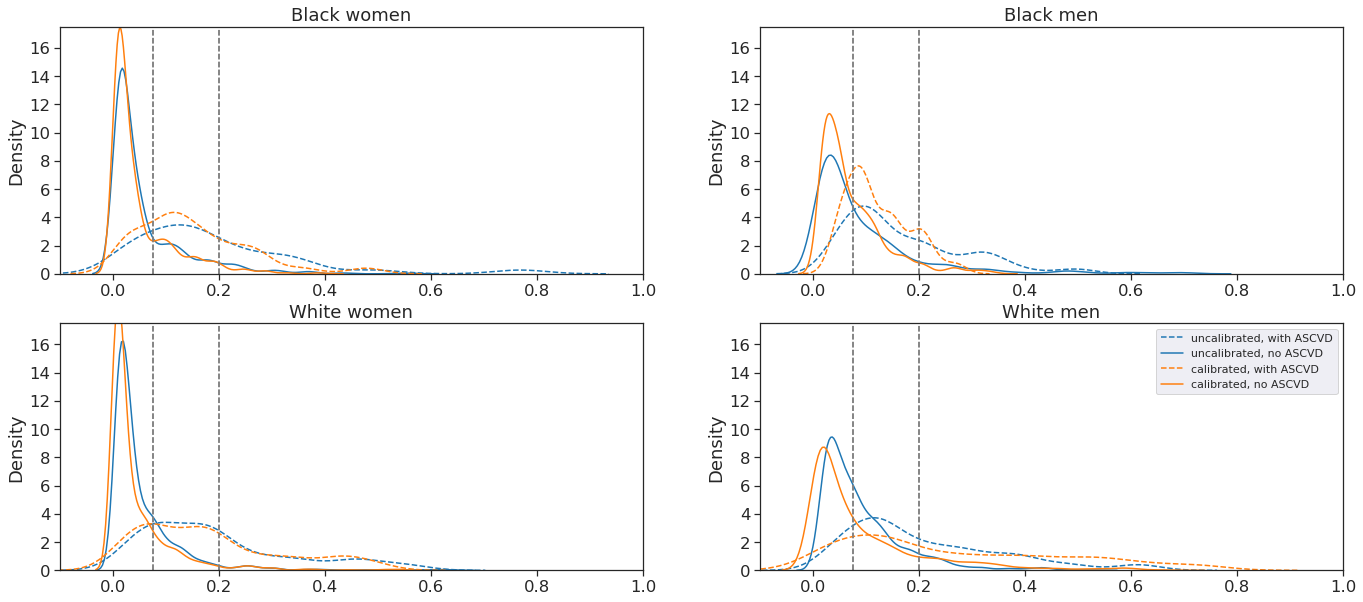

In [2]:
output_path = os.path.join(experiment_plot_path, 'prediction_distributions.png')

if include_recalibrated:
    unique_model_types = preds.calibrated.unique()
    model_type_var = 'calibrated'
else:
    unique_model_types = preds.lambda_reg.unique()
    model_type_var = 'lambda_reg'
    
    
sns.despine(left=True)

sns.set(font_scale=1.5)
sns.set_style("ticks")
    
config_ids_to_plot = [True, False]   
f, axes = plt.subplots(2,2, figsize=(23,10), sharex=False, sharey=False)
palette = iter(sns.color_palette("tab10",n_colors=len(config_ids_to_plot)))
indices = {0: (0,0), 1: (1,0), 2: (0,1), 3: (1,1)}

model_names = {(False, 0): 'uncalibrated, no ASCVD',
               (False, 1): 'uncalibrated, with ASCVD',
               (True, 0): 'calibrated, no ASCVD',
               (True, 1): 'calibrated, with ASCVD'}

# for model_type in unique_model_types:
#     if include_recalibrated:
#         group_df = preds.query("(group==@group) & (calibrated==@model_type)")
#     else:
#         group_df = preds.query("(group==@group) & (lambda_reg==@model_type)")

                    
#for config_id in config_ids_to_plot:
for model_type in unique_model_types:

        
    color=next(palette)
    for idx, grp in enumerate(range(1,5)):
        if include_recalibrated:
            group_df = preds.query("(group==@grp) & (calibrated==@model_type)")
            model_names = {(False, 0): 'uncalibrated, no ASCVD',
                           (False, 1): 'uncalibrated, with ASCVD',
                           (True, 0): 'calibrated, no ASCVD',
                           (True, 1): 'calibrated, with ASCVD'}
        else:
            group_df = preds.query("(group==@grp) & (lambda_reg==@model_type)")
        loop_args = {'shade': False, 
                #'label': model_type, 
                'ax': axes[indices[idx]], 
                'color':color}
        ax = sns.kdeplot(data=group_df.query("labels==1"), 
                         x="pred_probs",
                         **loop_args,
                         label = model_names[(model_type, 1)],
                         linestyle="--")
        ax = sns.kdeplot(data=group_df.query("labels==0"), 
                         x="pred_probs",
                         **loop_args,
                         label = model_names[(model_type, 0)],
                         legend=True)
        
        ax.set(xlim=(-0.1,1))
        ax.set(ylim=(0,17.5))
        ax.set_title(args['grp_label_dict'][grp])
        ax.set_xlabel("")
        ax.axvline(x=0.075, linestyle='--', color='grey')
        ax.axvline(x=0.2, linestyle='--', color='grey')
        
sns.set(font_scale=1)
ax.legend()

if output_path is not None:
    f.savefig(output_path)

In [3]:
num_treated_by_stratum = (preds
     .query('(phase=="test") ')
     .filter(['group', 'treat', 'person_id', model_type_var, 'labels'])
     .groupby([model_type_var,  'group', 'labels', 'treat'])
     .count()
    )

num_per_stratum = (preds
      .query('(phase=="test") ')

           .filter(['group', 'person_id', model_type_var, 'labels'])
           .groupby([model_type_var,  'group', 'labels'])
           .count()
     )

frac_treated = num_treated_by_stratum.div(num_per_stratum)

frac_treated = (frac_treated
                .reset_index()
                .assign(group = lambda x: x.group.map(args['grp_label_dict']),
                        labels = lambda x: x.labels.map({0: 'no ASCVD event',
                                                         1: 'ASCVD event'}))
               )

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

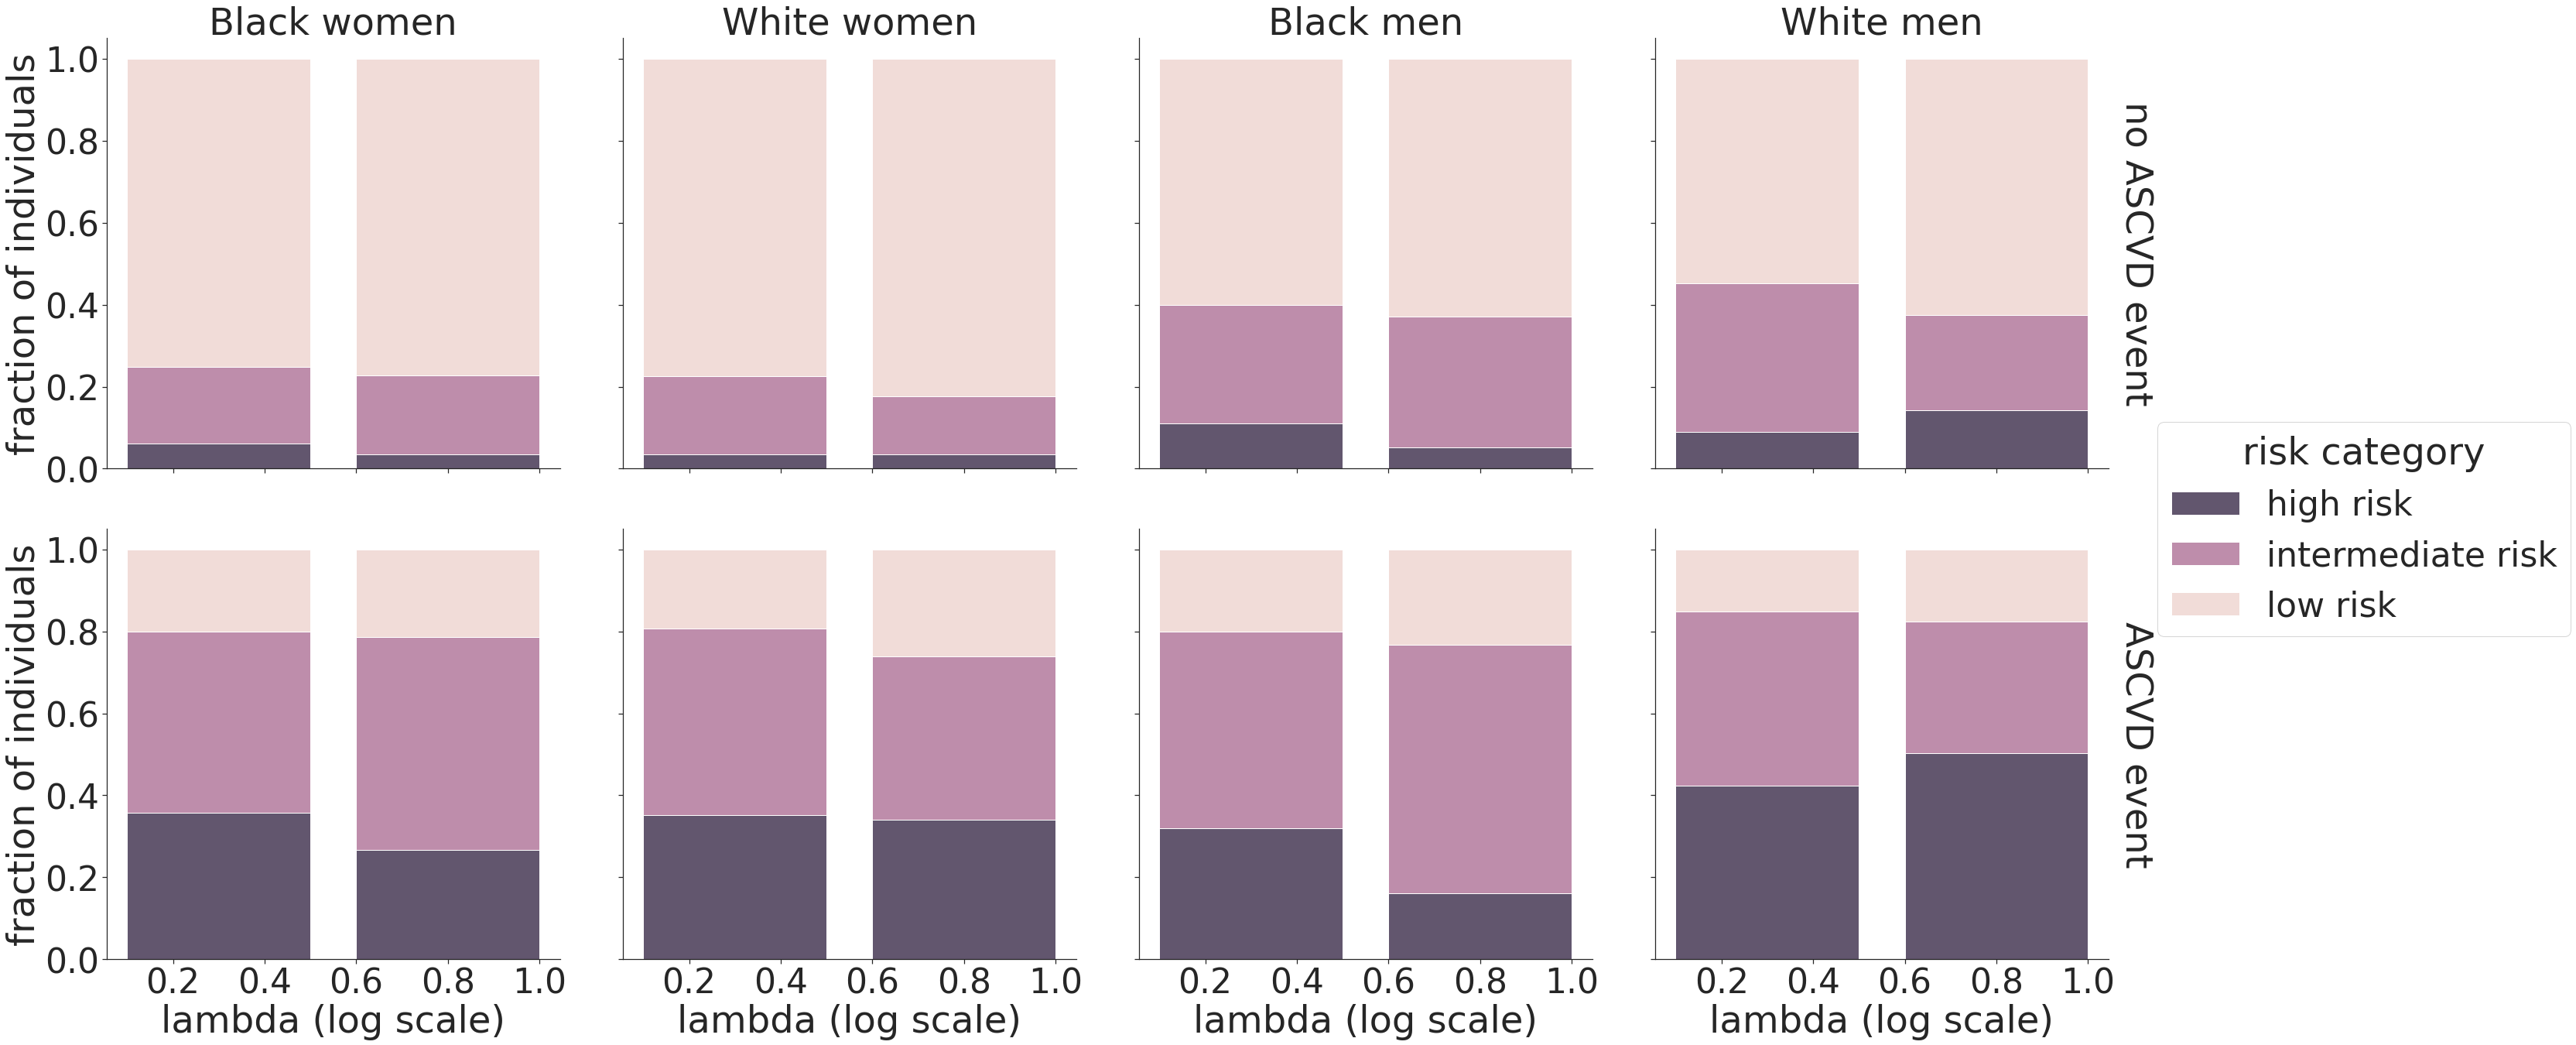

In [4]:
output_path = os.path.join(experiment_plot_path, 'risk_category_counts.png')


sns.set(font_scale=4)
sns.set_style("ticks")


g = sns.displot(
    frac_treated,
    x=model_type_var,
    col="group", 
    row='labels', 
    hue="treat", 
    weights='person_id', 
    shrink=0.8, 
    multiple='stack',
    height=10, 
    bins=len(unique_model_types), 
    hue_order=['0','1','2',], 
    legend=False, #stat='frequency', 
    facet_kws = {'margin_titles': True}
)


plt.legend(title='risk category',
           loc='center left', 
           labels=['high risk', 'intermediate risk', 'low risk'],
           bbox_to_anchor=(1.07, 1)
          )

# TODO: set lambda on x axis
(g.set_xlabels('lambda (log scale)')
 .set_ylabels('fraction of individuals')
 .set_titles(row_template="{row_name}", col_template="{col_name}")
)

sns.set(font_scale=1)


if output_path is not None:
    g.savefig(output_path)

In [5]:

# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()
# #sns.set_style("white")
# sns.set_style("ticks")
# custom_palette = ["red", "green", "orange", "blue"]
# sns.set_palette(custom_palette)
# grp_label_dict = {1: 'Black women', 2: 'White women', 3: 'Black men', 4: 'White men'}    

# output_path = '/labs/shahlab/projects/agataf/fairness_utility/eval/plots'
# os.makedirs(output_path, exist_ok = True)

# experiment_plot_path = os.path.join(output_path, EXPERIMENT_NAME)
# os.makedirs(experiment_plot_path, exist_ok = True)

# aggregate_path = os.path.join(args['base_path'], 'experiments', EXPERIMENT_NAME, 'performance', 'all')
# os.makedirs(aggregate_path, exist_ok = True)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#sns.set_style("white")
sns.set_style("ticks")
custom_palette = ["red", "green", "orange", "blue"]
sns.set_palette(custom_palette)

### get results

In [14]:
df.head()

,metric,group,performance,performance_overall,fold_id,config_id,model_id,model_type
0,auc,1,0.832008,0.816429,1,0,0,erm
1,auc,2,0.834049,0.816429,1,0,0,erm
2,auc,3,0.752576,0.816429,1,0,0,erm
3,auc,4,0.802226,0.816429,1,0,0,erm
4,auprc,1,0.274052,0.273326,1,0,0,erm


### threshold-based performance metrics

In [33]:
discovery_omission = pd.DataFrame(preds
                                  .query('(phase=="test")')
                                  .filter(['group', 'treat', 'person_id', 'model_id', 'labels', 'fold_id'])
                                  .assign(f_discovery_rate_075 = lambda x: np.where((x.labels==0) & (x.treat>0), 1, 0),
                                          f_omission_rate_075 = lambda x: np.where((x.labels==1) & (x.treat==0), 1, 0),
                                          f_discovery_rate_20 = lambda x: np.where((x.labels==0) & (x.treat==2), 1, 0),
                                          f_omission_rate_20 = lambda x: np.where((x.labels==1) & (x.treat<2), 1, 0),
                                          fraction_treated = lambda x: np.where(x.treat>0, 1, 0),
                                         )
                                  .filter(['group', 'model_id', 'fold_id',
                                           'f_discovery_rate_075', 'f_omission_rate_075',
                                           'f_discovery_rate_20', 'f_omission_rate_20',
                                           'fraction_treated'])
                                  .groupby(['model_id', 'fold_id','group'])
                                  .mean()
                                  .stack()
                                  .reset_index()
                                  .rename(columns={'level_3':'metric', 0:'performance'})
                                 )


In [13]:

df = pd.read_csv(os.path.join(aggregate_path, 'standard_evaluation.csv'))


In [22]:
df.metric.unique()

array(['auc', 'auprc', 'brier', 'loss_bce', 'ace_rmse_logistic_log',
       'ace_abs_logistic_log', 'specificity_0.075', 'specificity_0.2',
       'recall_0.075', 'recall_0.2'], dtype=object)

In [18]:
plot_df = (df
 .set_index(['model_id','fold_id'], drop=True)
 #.merge(differences, how='outer', on=['lambda_reg', 'fold_id'])
 .filter(['metric', 'performance_overall', 'performance', 'violation', 'group'])
 .drop_duplicates()
           .reset_index()
)

In [23]:
df_threshold_1

,model_id,fold_id,metric,performance_overall,performance,group,lambda_reg,threshold
24,0.0,1,specificity,0.688713,0.767956,1,NaN,7.5%
25,0.0,1,specificity,0.688713,0.765007,2,NaN,7.5%
26,0.0,1,specificity,0.688713,0.608848,3,NaN,7.5%
27,0.0,1,specificity,0.688713,0.579841,4,NaN,7.5%
32,0.0,1,sensitivity,0.809990,0.761193,1,NaN,7.5%
...,...,...,...,...,...,...,...,...
186,NaN,10,false omission rate,NaN,0.013614,2,0.0,7.5%
190,NaN,10,false discovery rate,NaN,0.351632,3,0.0,7.5%
191,NaN,10,false omission rate,NaN,0.019288,3,0.0,7.5%
195,NaN,10,false discovery rate,NaN,0.371612,4,0.0,7.5%


In [35]:
df_thresholds.head()

,model_id,fold_id,metric,performance_overall,performance,group,threshold
24,0,1,specificity,0.688713,0.767956,1,7.5%
25,0,1,specificity,0.688713,0.765007,2,7.5%
26,0,1,specificity,0.688713,0.608848,3,7.5%
27,0,1,specificity,0.688713,0.579841,4,7.5%
32,0,1,sensitivity,0.809990,0.761193,1,7.5%


<ipython-input-34-504ca4d8703c>:41: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')


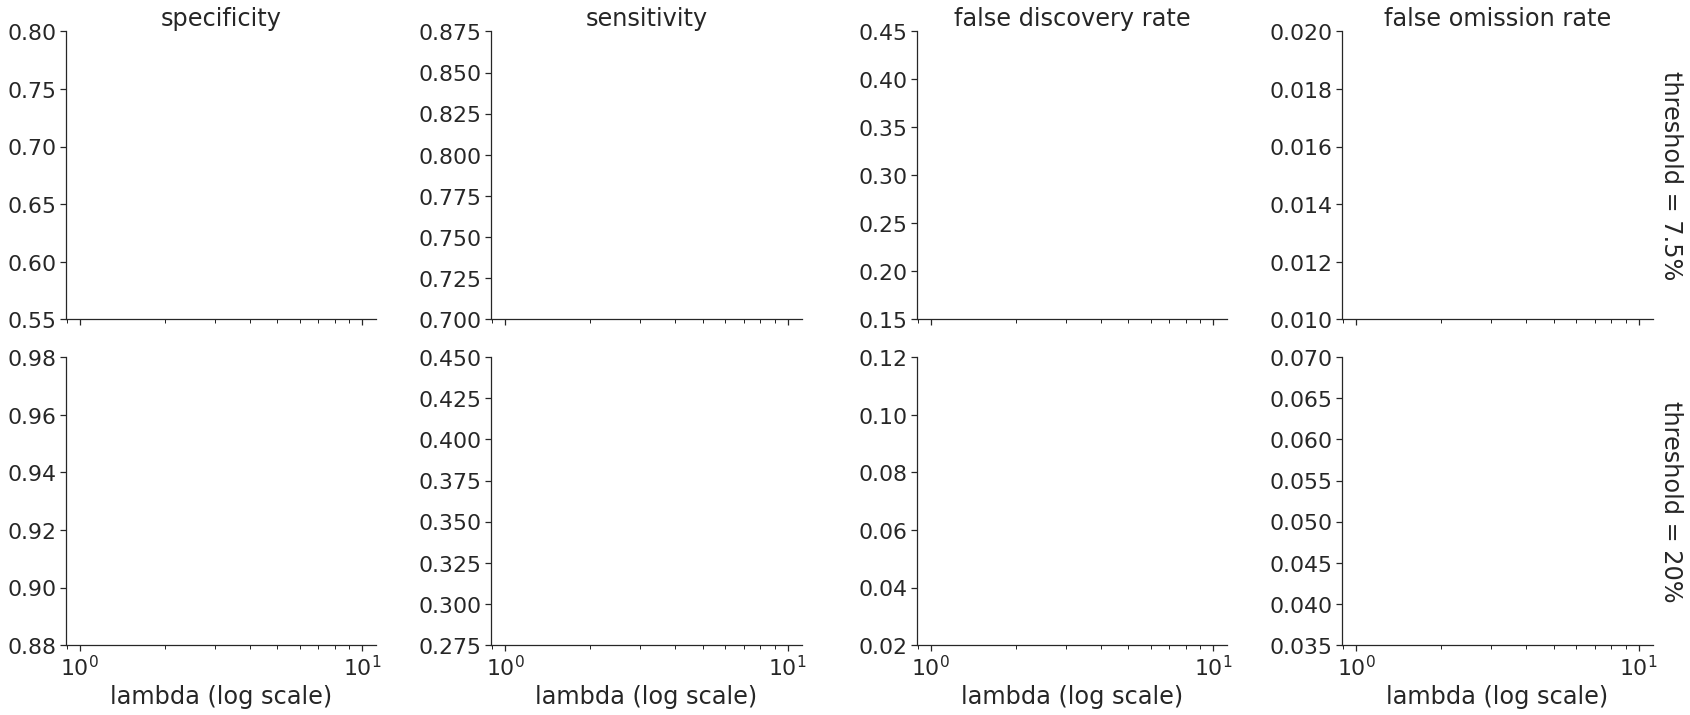

In [34]:
output_path = os.path.join(experiment_plot_path, 'threshold_metrics.png')

df_threshold_1 = (plot_df.query('(metric=="specificity_0.075") | (metric=="recall_0.075")')
                  .append(discovery_omission.query('(metric=="f_discovery_rate_075") | \
                              (metric=="f_omission_rate_075")'))
                  .assign(metric=lambda x: x.metric.map({'specificity_0.075': 'specificity',
                                                         'recall_0.075': 'sensitivity',
                                                         'f_discovery_rate_075': 'false discovery rate',
                                                         'f_omission_rate_075': 'false omission rate'}),
                         threshold='7.5%')

                 )
df_threshold_2 = (plot_df.query('(metric=="specificity_0.2") | (metric=="recall_0.2")')
                  .append(discovery_omission.query('(metric=="f_discovery_rate_20") | \
                              (metric=="f_omission_rate_20")'))
                  .assign(metric=lambda x: x.metric.map({'specificity_0.2': 'specificity',
                                                         'recall_0.2': 'sensitivity',
                                                         'f_discovery_rate_20': 'false discovery rate',
                                                         'f_omission_rate_20': 'false omission rate'}),
                         threshold='20%')

                 )

df_thresholds = df_threshold_1.append(df_threshold_2)

sns.set(font_scale=2)
sns.set_style("ticks")

g = sns.relplot(data = df_thresholds,
                x = 'model_id',
                y = 'performance',
                col='metric',
                row='threshold',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                legend=False,
                aspect=1.2)
plt.xscale('log')
(g.set_xlabels('lambda (log scale)')
 .set_ylabels('')
 .set_titles(row_template="threshold = {row_name}", col_template="{col_name}")
 .set_yticklabels()
)
#plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'])
         # bbox_to_anchor=(1, 0.9))#bbox_to_anchor=(1, 1))

sns.set(font_scale=1)

if output_path is not None:
    g.savefig(output_path)

### get decision changes

In [ ]:
output_path = os.path.join(experiment_plot_path, 'prediction_distributions.png')


sns.despine(left=True)

sns.set(font_scale=1.5)
sns.set_style("ticks")
    
    
f, axes = plt.subplots(2,2, figsize=(23,10), sharex=False, sharey=False)
palette = iter(sns.color_palette("tab10",n_colors=len(range(0,num_configs,2))))
indices = {0: (0,0), 1: (1,0), 2: (0,1), 3: (1,1)}


for config_id in range(0,num_configs,2):
    color=next(palette)
    for idx, grp in enumerate(range(1,5)):
        args = {'shade': False, 
                'label': config_id, 
                'ax': axes[indices[idx]], 
                'color':color}
        ax = sns.kdeplot(data=preds.query("config_id==@config_id & group==@grp & labels==1"), 
                         x="pred_probs",
                         **args,
                         linestyle="--")
        ax = sns.kdeplot(data=preds.query("config_id==@config_id & group==@grp & labels==0"), 
                         x="pred_probs",
                         **args,
                         legend=True)
        
        ax.set(xlim=(-0.1,1))
        ax.set(ylim=(0,17.5))
        ax.set_title(args['grp_label_dict'][grp])
        ax.set_xlabel("")
        ax.axvline(x=0.075, linestyle='--', color='grey')
        ax.axvline(x=0.2, linestyle='--', color='grey')
        
sns.set(font_scale=1)
ax.legend()

if output_path is not None:
    g.savefig(output_path)

In [ ]:
from sklearn import metrics

aucs = []
for lambda_reg in preds.lambda_reg.unique():
    for fold_id in range(1,11):
        for group in range(1,5):
            grp_df = preds.query("(lambda_reg==@lambda_reg) & (fold_id==@fold_id) & (group==@group)")
            fpr, tpr, _ = metrics.roc_curve(grp_df.labels,  grp_df.pred_probs)
            df_aucs = pd.DataFrame({
                'fpr': fpr,
                'tpr': tpr,
                'lambda_reg': lambda_reg,
                'fold_id': fold_id,
                'group': group
            })
            aucs.append(df_aucs)

aucs = pd.concat(aucs)

In [ ]:
from sklearn import metrics

mean_fold_aucs = []
for lambda_reg in preds.lambda_reg.unique():
    for group in range(1,5):
        grp_df = preds.query("(lambda_reg==@lambda_reg) & (group==@group)")
        fpr, tpr, _ = metrics.roc_curve(grp_df.labels,  grp_df.pred_probs)
        df_aucs = pd.DataFrame({
                'fpr': fpr,
                'tpr': tpr,
                'lambda_reg': str(lambda_reg.round(3)),
                'group': group
            })
        mean_fold_aucs.append(df_aucs)

mean_fold_aucs = pd.concat(mean_fold_aucs)#.assign(lambda_reg = lambda x: str(x.lambda_reg))

In [ ]:
g = sns.relplot(data = mean_fold_aucs,
                x = 'fpr',
                y = 'tpr',
                #row = 'is_white',
                col = 'group',
                kind = 'line',
                hue = 'lambda_reg',
                facet_kws = {'sharey': True, 'sharex': True},# 'margin_titles': True},
                legend = True,
                ci='sd',
                aspect = 1.2
               )

axes = g.axes.flatten()
